In [11]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
data = BinaryIV.generate_data_rolling_ate(N_simulations=50)

In [21]:
binaryIV = BinaryIV('IV Dag', data)

binaryIV.bound_ate_causaloptim()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In boundsfunc(p00_0 = p00_0, p00_1 = p00_1, p10_0 = p10_0, p10_1 = p10_1,  :
R[write to console]: 
 
R[write to console]:  Invalid bounds! Data probably does not satisfy the assumptions in the DAG!



Causaloptim avg bound width: 0.6368282061852313
Causaloptim Invalid Rate: 0.1


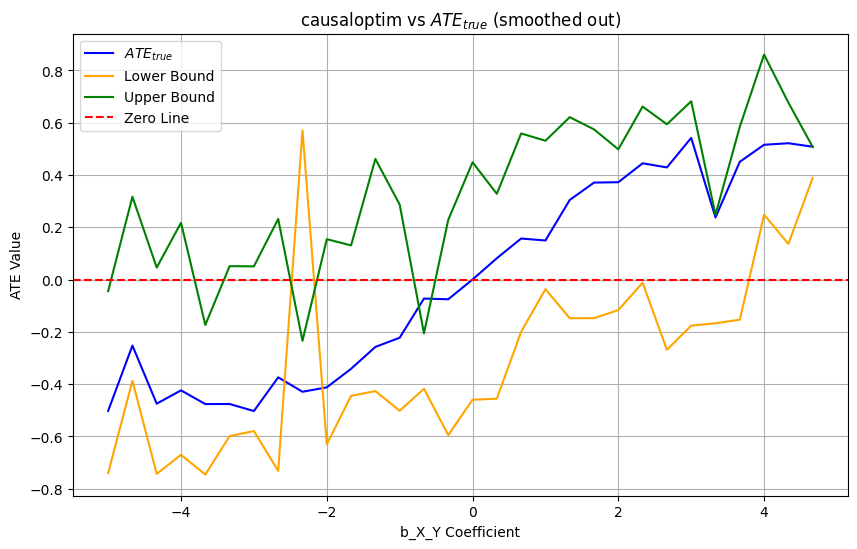

In [ ]:
binaryIV.data

print(f"Causaloptim avg bound width:", binaryIV.data['causaloptim_bound_width'].mean())
print(f"Causaloptim Invalid Rate:", binaryIV.data[binaryIV.data['causaloptim_bound_valid'] == False].shape[0] / binaryIV.data.shape[0])
PlottingUtil.plot_smoothed_ate_vs_bounds(binaryIV.data, 'causaloptim', 1)
